# Analisis Game yang Memiliki Potensi untuk Berhasil



# Pendahuluan


Anda bekerja di toko daring "Ice" yang menjual video game dari seluruh dunia. Data terkait ulasan pengguna dan ahli game, genre, platform (misalnya Xbox atau PlayStation), dan data historis penjualan game tersedia dari sumber terbuka. Anda perlu mengidentifikasi pola-pola yang menentukan apakah suatu game dapat dikatakan berhasil atau tidak. Dengan begitu, Anda bisa menemukan game yang paling berpotensial dan merencanakan kampanye iklannya.

Di depan Anda tersedia data dari tahun 2016. Mari bayangkan bahwa sekarang adalah bulan Desember tahun 2016 dan Anda sedang merencanakan kampanye untuk tahun 2017.
(Saat ini, yang terpenting bagi Anda adalah untuk mendapatkan pengalaman bekerja dengan data. Tidak masalah apakah Anda meramalkan penjualan tahun 2017 berdasarkan data dari tahun 2016 atau meramalkan penjualan tahun 2027 berdasarkan data dari tahun 2026.).

# Ikthisar Data

In [53]:
#memuat semua library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st


In [2]:
#memuat data
games = pd.read_csv('/datasets/games.csv')
games.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6283,Gunship,PS,1996.0,Simulation,0.15,0.10,0.00,0.02,NaN,NaN,NaN
6001,Supercross 2000,N64,1999.0,Racing,0.23,0.06,0.00,0.00,NaN,NaN,NaN
15290,Geon Cube,Wii,2009.0,Puzzle,0.02,0.00,0.00,0.00,NaN,tbd,E
9505,Iridion II,GBA,2003.0,Shooter,0.09,0.03,0.00,0.00,78.0,tbd,E
11032,Doraemon: Nobita to Midori no Kyojinden DS,DS,2008.0,Platform,0.00,0.00,0.09,0.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.isna().sum().sort_values(ascending=False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

In [5]:
games.duplicated().sum()

0

## Kesimpulan Ikhtisar Data

* Terdapat kolom yang harus diubah tipe datanya, yaitu kolom `User_Score` dan `Rating` dari tipe data object ke tipe data float
* Merubah tipe data di kolom `Year_of_Release` menjadi integer
* Merubah semua nama kolom dengan huruf kecil
* Terdapat beberapa kolom dengan nilai yang hilang yaitu kolom `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, dan `Rating`

# Pra-Pemrosesan Data

## Memperbaiki data


In [6]:
#mengubah nama kolom menjadi huruf kecil
games = games.rename(
    columns = {
    'Name' : 'name',
    'Platform' : 'platform',
    'Year_of_Release' : 'year_of_release',
    'Genre' : 'genre',
    'NA_sales' : 'na_sales',
    'EU_sales' : 'eu_sales',
    'JP_sales' : 'jp_sales',
    'Other_sales' : 'other_sales',
    'Critic_Score' : 'critic_score',
    'User_Score' : 'user_score',
    'Rating' : 'rating'   
    }
)
print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [7]:
games['platform'] = games['platform'].str.lower()
games['genre'] = games['genre'].str.lower()

In [12]:
#mengubah tipe data menjadi integer
df['year_of_release'] = df['year_of_release'].astype(int)

/tmp/ipykernel_100/3298519829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_of_release'] = df['year_of_release'].astype(int)


In [8]:
#memeriksa presentase nilai yang hilang
(games.isna().sum().sort_values(ascending=False)/games.shape[0]) * 100

critic_score       51.319174
rating             40.478612
user_score         40.089740
year_of_release     1.609333
name                0.011965
genre               0.011965
platform            0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
dtype: float64

Karena nilai yang hilang pada kolom `year_of_release`, `name`, dan `genre` masih tergolong sedikit, maka kita akan menghapus nilainya.

In [9]:
df = games.dropna(subset=['year_of_release', 'name','genre'])
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9810,My Farm Around the World,ds,2008.0,simulation,0.11,0.00,0.00,0.01,NaN,tbd,E
3918,SoulCalibur: Broken Destiny,psp,2009.0,fighting,0.12,0.20,0.07,0.12,80.0,6.2,T
7253,The Amazing Spider-Man 2 (2014),xone,2014.0,action,0.12,0.08,0.00,0.02,NaN,NaN,NaN
4702,Boku no Natsuyasumi 2: Umi no Bouken Hen,ps2,2002.0,adventure,0.00,0.00,0.41,0.00,NaN,NaN,NaN
7503,World Championship Cards,psp,2008.0,misc,0.19,0.00,0.00,0.02,NaN,tbd,E


## Memperkaya kualitas data

Pada kolom `user_score` terdapat nilai `tbd` yang berarti **to be determined** atau baru akan ditentukan. Hal ini disebabkan karena rating user pada game tersebut masih terlalu sedikit. Sehingga untuk mengganti nilai `tbd` kita akan memberi nilai rating 0.

In [10]:
#tbd bisa diganti 0 krn reviewnya br kurg dr 4
df['user_score'] = df['user_score'].replace(['tbd'], 0).astype(float)
df['user_score'].unique()

/tmp/ipykernel_100/2331136258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_score'] = df['user_score'].replace(['tbd'], 0).astype(float)


array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 0. , 8.8, 6.9, 9.4,
       6.8, 6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1,
       5.8, 5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1,
       3.5, 2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Untuk mengisi nilai rating yang hilang, maka kita akan mengisi nilainya dengan string **RP17+** yang merupakan rating yang masih pending namun kemungkinan besar akan memiliki konten 17+
Informasi ini diperoleh berdasarkan website ESRB rating.

In [11]:
df['rating']= df['rating'].fillna('RP17+')
df['rating'].unique()

/tmp/ipykernel_100/350363894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating']= df['rating'].fillna('RP17+')


array(['E', 'RP17+', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [14]:
df[['name','na_sales','eu_sales','jp_sales','other_sales']]

,name,na_sales,eu_sales,jp_sales,other_sales
0,Wii Sports,41.36,28.96,3.77,8.45
1,Super Mario Bros.,29.08,3.58,6.81,0.77
2,Mario Kart Wii,15.68,12.76,3.79,3.29
3,Wii Sports Resort,15.61,10.93,3.28,2.95
4,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00
...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,0.00,0.00,0.01,0.00
16711,LMA Manager 2007,0.00,0.01,0.00,0.00
16712,Haitaka no Psychedelica,0.00,0.00,0.01,0.00
16713,Spirits & Spells,0.01,0.00,0.00,0.00


Selanjutnya kita akan membuat kolom baru yang berisi total penjualan dari keseluruhan daerah dengan menjumlahkan semuanya.

In [15]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

/tmp/ipykernel_100/143246461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']


# Eksplorasi Data Analisis

## Menganalisis data penjualan

In [16]:
# menghitung jumlah game yang dirilis per tahun
total_game = df.pivot_table(index= 'year_of_release', values= 'name', aggfunc='count').sort_values(by='name', ascending=False)
total_game

,name
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


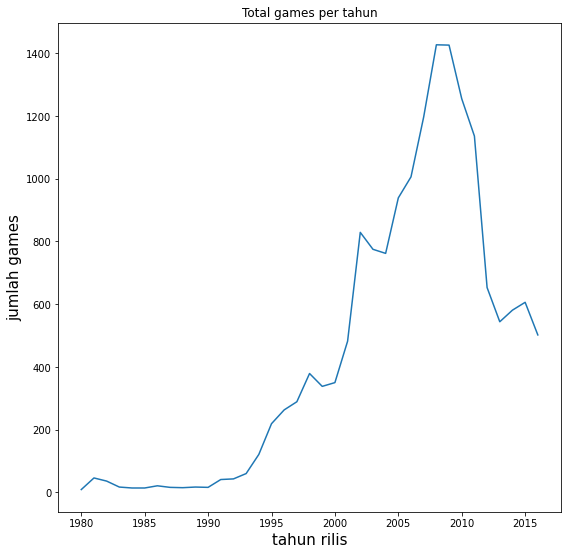

In [17]:
#line plot jumlah games yang dirilis dalam setahun
fig, ax = plt.subplots(figsize=(9, 9))
sns.lineplot(data=total_game, x='year_of_release', y='name').set_title('Total games per tahun')
ax.set_xlabel('tahun rilis',fontdict={'size': 15})
ax.set_ylabel('jumlah games',fontdict={'size': 15})
plt.show()

Dari perolehan lineplot di atas:

* Peningkatan jumlah games yang dirilis tiap tahunnya cenderung mengalami tren peningkatan 
* Tahun **2008** merupakan tahun dengan jumlah perilisan games terbanyak yaitu sejumlah 1427
* Setelah tahun 2008, perilisan games cenderung mengalami tren penurunan yang cukup drastis hingga tahun 2016

In [18]:
#total penjualan tiap platform

platform_sales = df.pivot_table(index= 'platform', values= 'total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
platform_sales.reset_index()
platform_sales['platform'] = platform_sales.index
platform_sales

,total_sales,platform
platform,,
ps2,1233.56,ps2
x360,961.24,x360
ps3,931.34,ps3
wii,891.18,wii
ds,802.78,ds
ps,727.58,ps
ps4,314.14,ps4
gba,312.88,gba
psp,289.53,psp


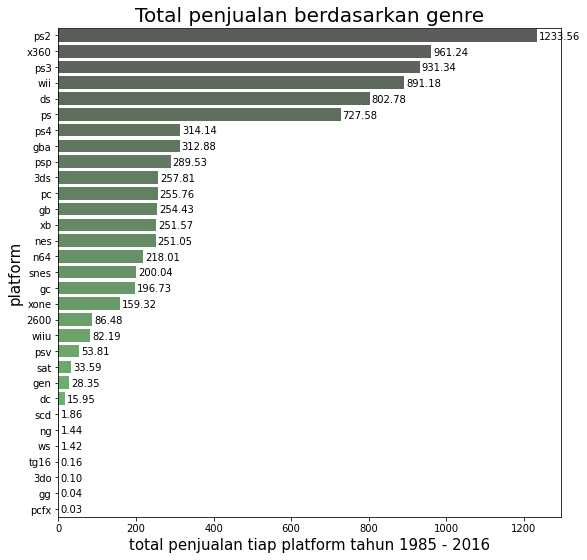

In [19]:
#bar plot total penjualan tiap platform 1985 - 2016

fig, ax = plt.subplots(figsize=(9, 9))
splot = sns.barplot(data=platform_sales, x='total_sales', y='platform', palette="dark:limegreen", alpha=0.75)

for p in splot.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center')
    
ax.set_xlabel('total penjualan tiap platform tahun 1985 - 2016',fontdict={'size': 15})
ax.set_ylabel('platform',fontdict={'size': 15})
plt.title('Total penjualan berdasarkan genre',fontdict={'size': 20})
plt.xticks(rotation = 0) 
plt.show()


Dari perolehan **bar plot** di atas:

* Platform dengan penjualan terbesar yaitu **ps2** dengan total 1233.56 juta dollar
* Terdapat sekitar 7 platform dengan total penjualan kurang dari 5 juta dollar per tahun, yaitu `scd`, `ng`, `ws`, `tg16`, `3do`, `gg`, dan `pcfx`.

Kita akan menyelidiki data penjualan per tahun dari platform dengan total penjualan tertinggi yaitu **ps2** 

In [20]:
#total penjualan ps2 pertahun

data_ps2 = df[df['platform'] == 'ps2'][['year_of_release','total_sales']]
ps2_pivot = data_ps2.pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc='sum').sort_values(by='year_of_release', ascending=True)
ps2_pivot['year_of_release'] = ps2_pivot.index
ps2_pivot

,total_sales,year_of_release
year_of_release,,
2000,39.17,2000
2001,166.43,2001
2002,205.38,2002
2003,184.31,2003
2004,211.81,2004
2005,160.66,2005
2006,103.42,2006
2007,75.99,2007
2008,53.90,2008


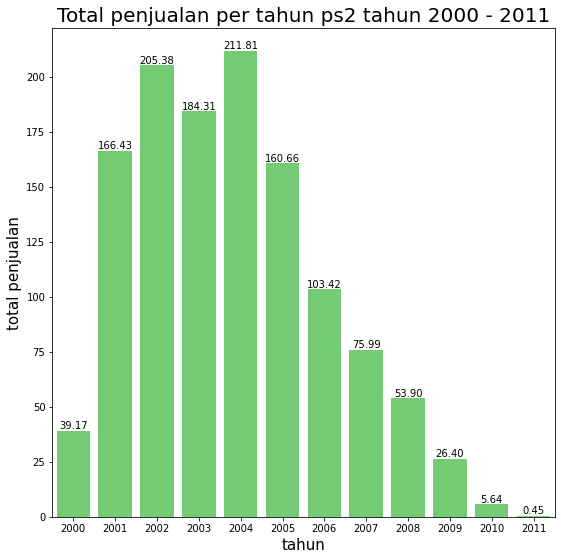

In [21]:
#bar plot total penjualan ps2 2000 - 2011

fig, ax = plt.subplots(figsize=(9, 9))
splot = sns.barplot(data=ps2_pivot, x='year_of_release', y='total_sales', color='limegreen', alpha=0.75)
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.2f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', size=10,
                   xytext = (0, 5), rotation=0,
                   textcoords = 'offset points')
    
ax.set_xlabel('tahun',fontdict={'size': 15})
ax.set_ylabel('total penjualan',fontdict={'size': 15})
plt.title('Total penjualan per tahun ps2 tahun 2000 - 2011',fontdict={'size': 20})
plt.xticks(rotation = 0) 
plt.show()

Dari perolehan **bar plot** di atas:

* PS2 mulai memasuki pasar sekitar tahun 2000 dengan penjualan 39.17 juta dollar
* Puncak penjualan terjadi pada tahun **2004** dengan total 211.81 juta dollar
* Setelah tahun 2004, ps2 mengalami **penurunan** yang signifikan hingga setelah tahun **2011** hingga sekarang tidak memiliki penjualan sama sekali
* Butuh waktu sekitar 4 tahun sebuah platform untuk mencapai puncaknya

Kita akan mencoba memfilter tahun perilisan platform agar bisa melihat platform mana yang masih memiliki penjualan dalam kurun waktu **3 tahun terakhir**

In [22]:
df1 = df.copy()
df1 = df1[df1['year_of_release'] >= 2014]
df1

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP17+,14.63
42,Grand Theft Auto V,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,RP17+,11.68
77,FIFA 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,RP17+,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP17+,0.01
16707,Aiyoku no Eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,RP17+,0.01
16710,Samurai Warriors: Sanada Maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,RP17+,0.01
16712,Haitaka no Psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP17+,0.01


In [23]:
df1['platform'].unique()

array(['ps4', '3ds', 'xone', 'wiiu', 'ps3', 'x360', 'pc', 'wii', 'psv',
       'psp'], dtype=object)

In [24]:
#memeriksa platform dengan penjualan terbanyak
df1.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
ps4     288.15
xone    140.36
3ds      86.68
ps3      68.18
x360     48.22
wiiu     42.98
pc       27.05
psv      22.40
wii       5.07
psp       0.36
Name: total_sales, dtype: float64

Selanjutnya kita akan memeriksa 5 platform dengan penjualan terbanyak, yaitu `ps4`, `xone`, `3ds`, `ps3`, dan `x360`.

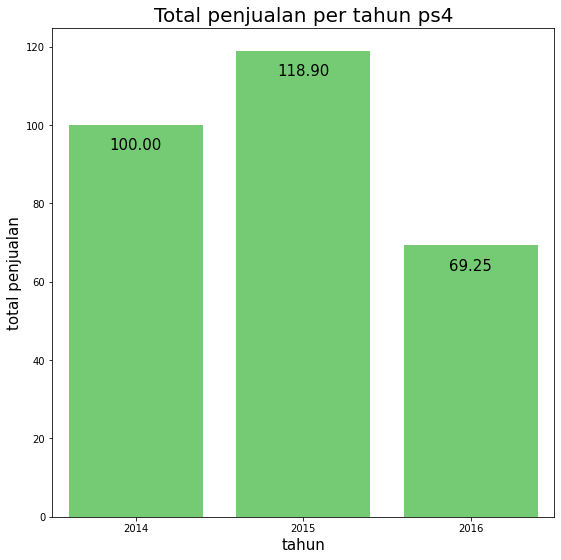

In [25]:
#total penjualan ps4 pertahun

data_ps4 = df1[df1['platform'] == 'ps4'][['year_of_release','total_sales']]
ps4_pivot = data_ps4.pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc='sum').sort_values(by='year_of_release', ascending=True)
ps4_pivot['year_of_release'] = ps4_pivot.index

#membuat bar plot
fig, ax = plt.subplots(figsize=(9, 9))
splot = sns.barplot(data=ps4_pivot, x='year_of_release', y='total_sales', color='limegreen', alpha=0.75)
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.2f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', size=15,
                   xytext = (0, -20), rotation=0,
                   textcoords = 'offset points')
    
ax.set_xlabel('tahun',fontdict={'size': 15})
ax.set_ylabel('total penjualan',fontdict={'size': 15})
plt.title('Total penjualan per tahun ps4',fontdict={'size': 20})
plt.xticks(rotation = 0) 
plt.show()

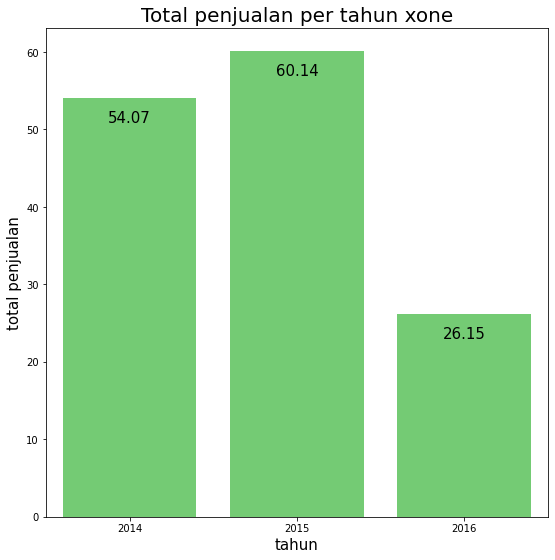

In [26]:
#total penjualan xone pertahun

data_xone = df1[df1['platform'] == 'xone'][['rating','year_of_release','total_sales']]
xone_pivot = data_xone.pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc='sum').sort_values(by='year_of_release', ascending=True)
xone_pivot['year_of_release'] = xone_pivot.index

#membuat bar plot
fig, ax = plt.subplots(figsize=(9, 9))
splot = sns.barplot(data=xone_pivot, x='year_of_release', y='total_sales', color='limegreen', alpha=0.75)
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.2f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', size=15,
                   xytext = (0, -20), rotation=0,
                   textcoords = 'offset points')
    
ax.set_xlabel('tahun',fontdict={'size': 15})
ax.set_ylabel('total penjualan',fontdict={'size': 15})
plt.title('Total penjualan per tahun xone',fontdict={'size': 20})
plt.xticks(rotation = 0) 
plt.show()


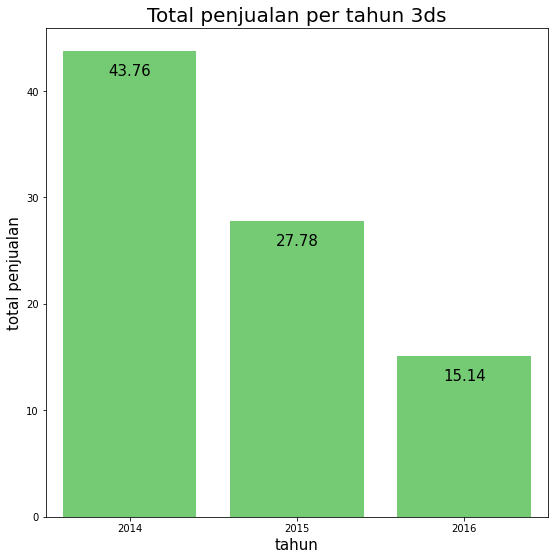

In [27]:
#total penjualan 3ds pertahun

data_3ds = df1[df1['platform'] == '3ds'][['year_of_release','total_sales']]
ds_pivot = data_3ds.pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc='sum').sort_values(by='year_of_release', ascending=True)
ds_pivot['year_of_release'] = ds_pivot.index

#membuat bar plot
fig, ax = plt.subplots(figsize=(9, 9))
splot = sns.barplot(data=ds_pivot, x='year_of_release', y='total_sales', color='limegreen', alpha=0.75)
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.2f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', size=15,
                   xytext = (0, -20), rotation=0,
                   textcoords = 'offset points')
    
ax.set_xlabel('tahun',fontdict={'size': 15})
ax.set_ylabel('total penjualan',fontdict={'size': 15})
plt.title('Total penjualan per tahun 3ds',fontdict={'size': 20})
plt.xticks(rotation = 0) 
plt.show()



In [28]:
#total penjualan ps3 pertahun

data_ps3 = df1[df1['platform'] == 'ps3'][['year_of_release','total_sales']]
ps3_pivot = data_ps3.pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc='sum').sort_values(by='year_of_release', ascending=True)
ps3_pivot


,total_sales
year_of_release,
2014,47.76
2015,16.82
2016,3.60


In [29]:
#total penjualan x360 pertahun

data_x360 = df1[df1['platform'] == 'x360'][['year_of_release','total_sales']]
x360_pivot = data_x360.pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc='sum').sort_values(by='year_of_release', ascending=True)
x360_pivot


,total_sales
year_of_release,
2014,34.74
2015,11.96
2016,1.52


Kemungkinan besar, nilai penjualan `ps3` yang menurun drastis karena sudah ada platform yang lebih baru yaitu `ps4`. Karena penjualan `ps3` dan `x360` di tahun 2016 sangat kecil, kita akan coba memeriksa platform lain yang memiliki penjualan yang lebih tinggi di tahun 2016.

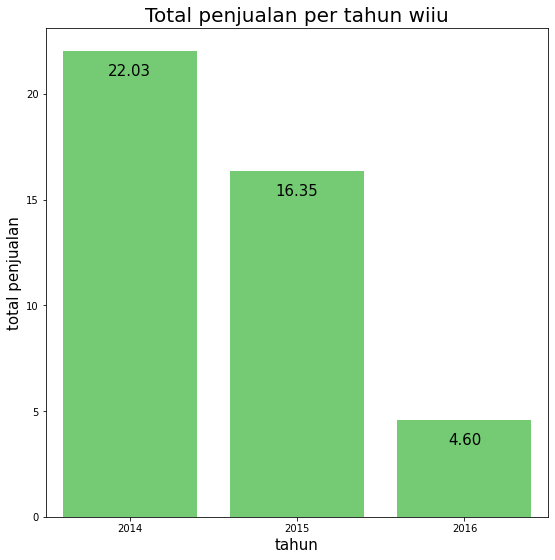

In [30]:
#total penjualan wiiu pertahun

data_wiiu = df1[df1['platform'] == 'wiiu'][['year_of_release','total_sales']]
wiiu_pivot = data_wiiu.pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc='sum').sort_values(by='year_of_release', ascending=True)
wiiu_pivot['year_of_release'] = wiiu_pivot.index

#membuat bar plot
fig, ax = plt.subplots(figsize=(9, 9))
splot = sns.barplot(data=wiiu_pivot, x='year_of_release', y='total_sales', color='limegreen', alpha=0.75)
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.2f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', size=15,
                   xytext = (0, -20), rotation=0,
                   textcoords = 'offset points')
    
ax.set_xlabel('tahun',fontdict={'size': 15})
ax.set_ylabel('total penjualan',fontdict={'size': 15})
plt.title('Total penjualan per tahun wiiu',fontdict={'size': 20})
plt.xticks(rotation = 0) 
plt.show()


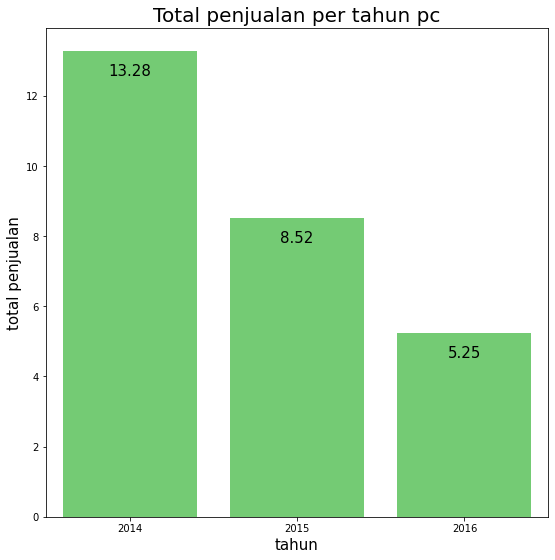

In [31]:
#total penjualan pc pertahun

data_pc = df1[df1['platform'] == 'pc'][['rating','year_of_release','total_sales']]
pc_pivot = data_pc.pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc='sum').sort_values(by='year_of_release', ascending=True)
pc_pivot['year_of_release'] = pc_pivot.index

#membuat bar plot
fig, ax = plt.subplots(figsize=(9, 9))
splot = sns.barplot(data=pc_pivot, x='year_of_release', y='total_sales', color='limegreen', alpha=0.75)
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.2f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', size=15,
                   xytext = (0, -20), rotation=0,
                   textcoords = 'offset points')
    
ax.set_xlabel('tahun',fontdict={'size': 15})
ax.set_ylabel('total penjualan',fontdict={'size': 15})
plt.title('Total penjualan per tahun pc',fontdict={'size': 20})
plt.xticks(rotation = 0) 
plt.show()


Setelah memeriksa beberapa total penjualan per tahun dari beberapa platform, diketahui bahwa:

* Tren dari keseluruhan platform cenderung mengalami penurunan penjualan 
* Kita akan mengambil platform `ps4`, `xone`, `3ds`, `wiiu`, dan `pc` sebagai 5 platform yang berpotensi untuk menghasilkan keuntungan

In [32]:
df1['platform'].describe()

count     1689
unique      10
top        ps4
freq       376
Name: platform, dtype: object

In [33]:
#boxplot penjualan global semua game yang dikelompokkan berdasarkan platform

query_platf = df1.query('platform in("ps4", "xone", "3ds", "wiiu", "pc") and year_of_release >= 2014')
sales_platf = query_platf.pivot_table(index= 'platform', values= ['total_sales','eu_sales','jp_sales','na_sales'], aggfunc='sum').sort_values(by='total_sales', ascending=False)
sales_platf.reset_index()
sales_platf['platform'] = sales_platf.index
sales_platf


,eu_sales,jp_sales,na_sales,total_sales,platform
platform,,,,,
ps4,130.04,15.02,98.61,288.15,ps4
xone,46.25,0.32,81.27,140.36,xone
3ds,16.12,44.24,22.64,86.68,3ds
wiiu,13.15,7.31,19.36,42.98,wiiu
pc,17.97,0.00,7.23,27.05,pc


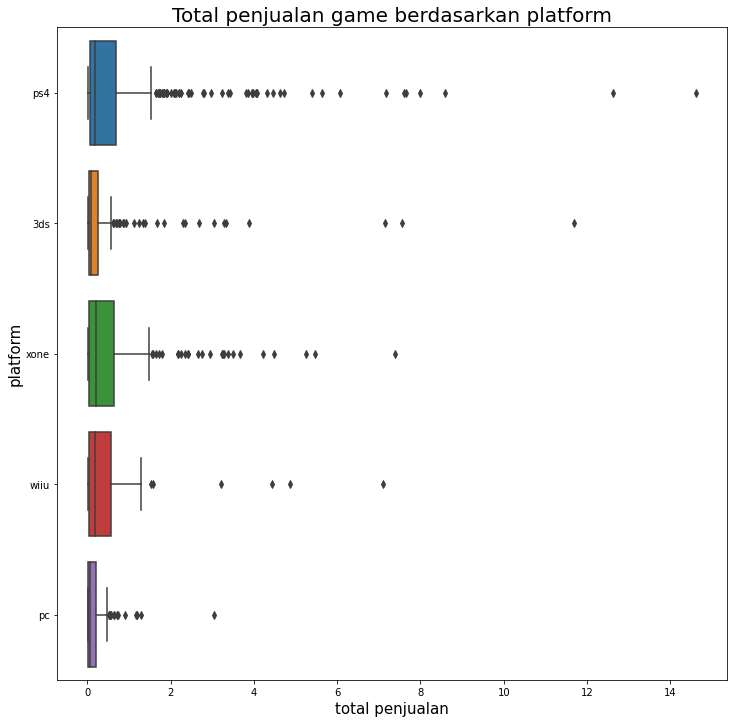

In [34]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.boxplot(data=query_platf, x='total_sales', y='platform').set_title('Total penjualan game berdasarkan platform',fontdict={'size': 20})
ax.set_xlabel('total penjualan',fontdict={'size': 15})
ax.set_ylabel('platform',fontdict={'size': 15})
plt.show()

Dari **boxplot penjualan berdasarkan platform** diketahui bahwa:

* Rentang nilai penjualan terpusat pada jumlah yang kecil yaitu di bawah 2 juta dollar
* Terdapat perbedaan total penjualan yang cukup signifikan terlihat dari adanya banyak outlier yang dapat mencapai 14 juta dollar


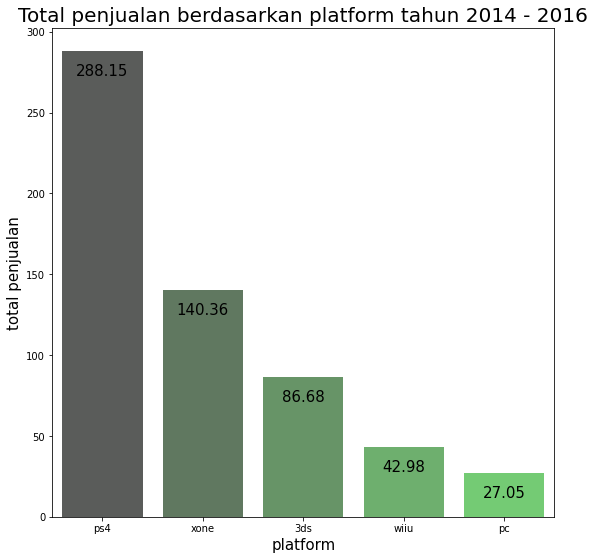

In [35]:
#bar


fig, ax = plt.subplots(figsize=(9, 9))
splot = sns.barplot(data=sales_platf, x='platform', y='total_sales', palette="dark:limegreen", alpha=0.75)
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.2f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', size=15,
                   xytext = (0, -20), rotation=0,
                   textcoords = 'offset points')
    
ax.set_xlabel('platform',fontdict={'size': 15})
ax.set_ylabel('total penjualan',fontdict={'size': 15})
plt.title('Total penjualan berdasarkan platform tahun 2014 - 2016',fontdict={'size': 20})
plt.xticks(rotation = 0) 
plt.show()

Dari **barplot penjualan berdasarkan platform** dari tahun 2014 hingga 2016 diketahui bahwa:

* **ps4** memiliki total penjualan **tertinggi** senilai 288.15 juta dollar
* Selisih antara total penjualan ps4 dengan platform lain cukup jauh

Selanjutnya kita akan mencari tahu apakah ulasan pengguna dan para profesional memengaruhi penjualan pada salah satu platform. Kita akan membuat scatterplot untuk melihat korelasinya

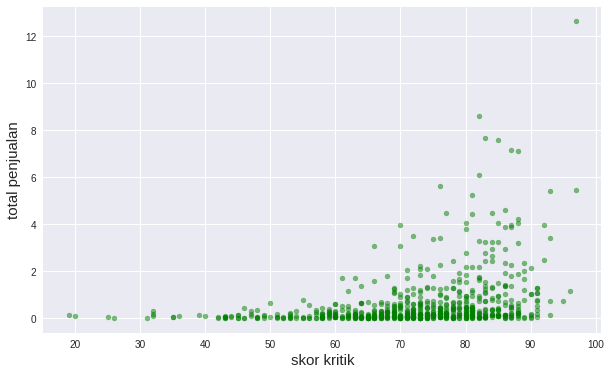

In [36]:
#scatterplot critic score dengan total penjualan

plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (10,6)
df1.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, c='g', s=25, alpha=0.5)
plt.xlabel('skor kritik', fontsize=15)
plt.ylabel('total penjualan', fontsize=15)
  
plt.show()

In [37]:
#menghitung korelasi kritik dengan penjualan

print(df1['critic_score'].corr(df1['total_sales']))

0.328105086966363


Dari perolehan **scatterplot skor kritik dengan penjualan** diketahui bahwa:

* Semakin **tinggi nilai kritiknya**, terdapat beberapa **penjualan** juga yang ikut **meningkat** meskipun **tidak** terlalu **signifikan**
* Nilai **kritik** yang **rendah** juga memiliki **penjualan** yang **rendah**
* Menurut perhitungan korelasi yang telah dilakukan, terdapat **hubungan** linear yang **lemah** antara nilai kritik dengan total penjualan games karena nilai korelasinya mendekati 0.

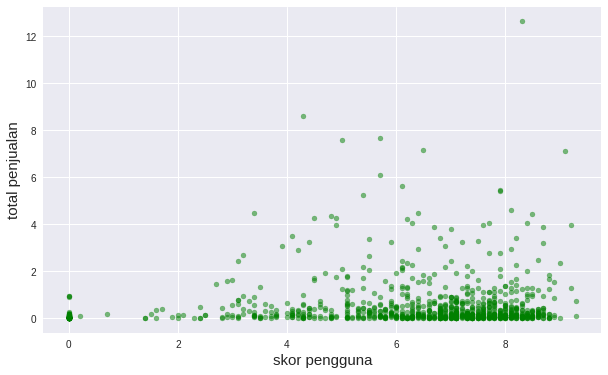

In [38]:
#scatterplot skor pengguna dengan total penjualan

plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (10,6)
df1.plot(x='user_score', y='total_sales', kind='scatter', grid=True, c='g', s=25, alpha=0.5)
plt.xlabel('skor pengguna', fontsize=15)
plt.ylabel('total penjualan', fontsize=15)
  
plt.show()

In [39]:
#menghitung korelasi skor pengguna dengan penjualan

print(df1['user_score'].corr(df1['total_sales']))

0.10185149290367497


Dari perolehan **scatterplot skor pengguna dengan penjualan** diketahui bahwa:

* Semakin **tinggi skor pengguna**, terdapat beberapa **penjualan** juga yang ikut **meningkat** meskipun **tidak** terlalu **signifikan**
* **Skor pengguna** yang **rendah** juga memiliki **penjualan** yang **rendah**
* Menurut perhitungan korelasi yang telah dilakukan, terdapat **hubungan** linear yang **lemah** antara nilai kritik dengan total penjualan games karena nilai korelasinya mendekati 0.

Sekarang kita akan membandingkan penjualan game yang sama pada platform lain.

In [40]:
#total penjualan berdasarkan nama game tahun 2014 - 2016

games_sales = df1.pivot_table(index= ['name','platform'], values= 'total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10)
games_sales

,,total_sales
name,platform,
Call of Duty: Black Ops 3,ps4,14.63
Grand Theft Auto V,ps4,12.62
Pokemon Omega Ruby/Pokemon Alpha Sapphire,3ds,11.68
FIFA 16,ps4,8.58
Star Wars Battlefront (2015),ps4,7.98
Call of Duty: Advanced Warfare,ps4,7.66
FIFA 17,ps4,7.60
Super Smash Bros. for Wii U and 3DS,3ds,7.55
Call of Duty: Black Ops 3,xone,7.39


Kita akan mengambil game **Grand Theft Auto V**	dan **FIFA 16** untuk kita bandingkan penjualannya di berbagai platform.

In [41]:
#membandingkan penjualan game yang sama pada platform lain


df1.query('name in("Grand Theft Auto V") and platform in("ps4","xone","3ds","wiiu","pc")')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,xone,2014,action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
1730,Grand Theft Auto V,pc,2015,action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17


In [42]:
df1.query('name in("FIFA 16") and platform in("ps4","xone","3ds","wiiu","pc")')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
77,FIFA 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
417,FIFA 16,xone,2015,sports,0.89,2.12,0.00,0.24,84.0,4.4,E,3.25
7575,FIFA 16,pc,2015,sports,0.06,0.13,0.00,0.01,81.0,4.4,E,0.20


Dari penjualan kedua games di atas, dapat diketahui bahwa:

* Terdapat perbedaan penjualan jenis games yang sama di setiap platform
* Games yang berada di platform **ps4** terjual lebih banyak dibandingkan dengan platform lain
* **Skor pengguna** ataupun **skor kritik** yang **tinggi** dapat **mempengaruhi** nilai **penjualannya** meskipun **tidak signifikan**.

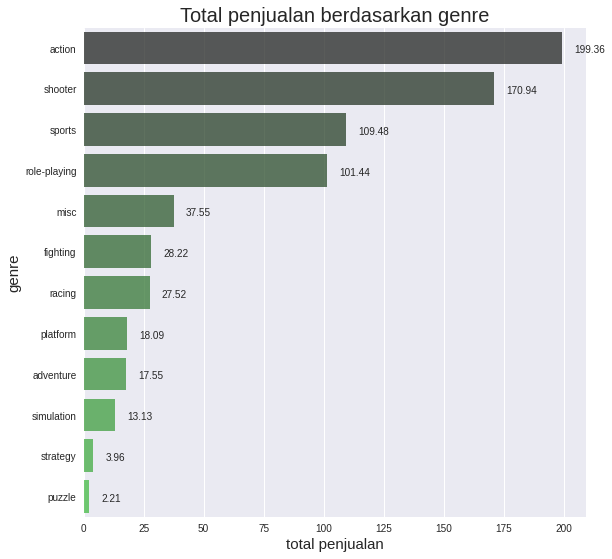

In [43]:
#total penjualan berdasarkan genre

genre_sales = df1.pivot_table(index= 'genre', values= ['total_sales','eu_sales','jp_sales','na_sales'], aggfunc='sum').sort_values(by='total_sales', ascending=False)
genre_sales['genre'] = genre_sales.index

#membuat barplot

fig, ax = plt.subplots(figsize=(9, 9))
splot = sns.barplot(data=genre_sales, x='total_sales', y='genre', palette="dark:limegreen", alpha=0.75)

for p in splot.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center')
    
ax.set_xlabel('total penjualan',fontdict={'size': 15})
ax.set_ylabel('genre',fontdict={'size': 15})
plt.title('Total penjualan berdasarkan genre',fontdict={'size': 20})
plt.xticks(rotation = 0) 
plt.show()


Dari **barplot penjualan berdasarkan genre** dari tahun 2014 hingga 2016 diketahui bahwa:

* Genre **action** merupakan genre dengan nilai penjualan yang tertinggi senilai hampir 200 juta dollar
* Genre **puzzle** merupakan genre dengan nilai penjualan yang terendah senilai 2 juta dollar
* 3 genre terlaris merupakan games yang menantang adrenalin dan genre yang kurang menarik minat yaitu games yang tidak menantang 

## Pemrofilan masing-masing wilayah

In [44]:
#variasi pangsa pasar dari satu wilayah ke wilayah lainnya

sales_platf['total_eu'] = sales_platf['eu_sales'].sum()
sales_platf['total_na'] = sales_platf['na_sales'].sum()
sales_platf['total_jp'] = sales_platf['jp_sales'].sum()
sales_platf

,eu_sales,jp_sales,na_sales,total_sales,platform,total_eu,total_na,total_jp
platform,,,,,,,,
ps4,130.04,15.02,98.61,288.15,ps4,223.53,229.11,66.89
xone,46.25,0.32,81.27,140.36,xone,223.53,229.11,66.89
3ds,16.12,44.24,22.64,86.68,3ds,223.53,229.11,66.89
wiiu,13.15,7.31,19.36,42.98,wiiu,223.53,229.11,66.89
pc,17.97,0.00,7.23,27.05,pc,223.53,229.11,66.89


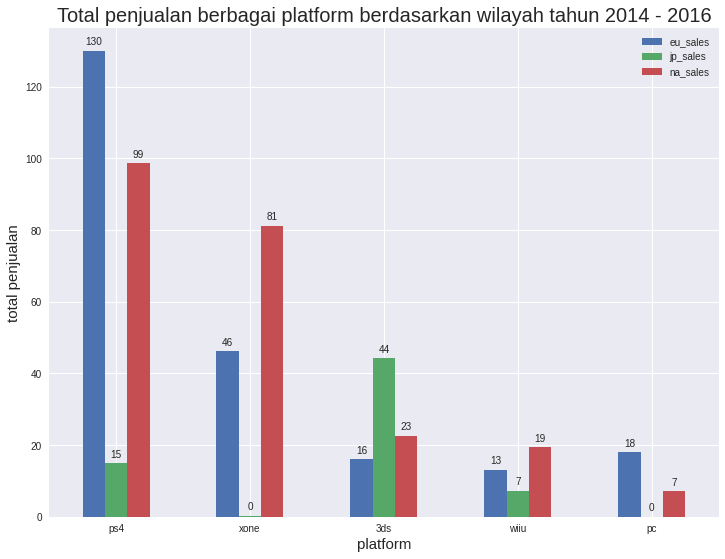

In [46]:
#barplot penjualan berbagai platform berdasarkan wilayah tahun 2014 - 2016

ax = sales_platf.plot(x="platform", y=['eu_sales','jp_sales','na_sales'], kind="bar",figsize=(12,9))

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set_xlabel('platform',fontdict={'size': 15})
ax.set_ylabel('total penjualan',fontdict={'size': 15})
plt.title('Total penjualan berbagai platform berdasarkan wilayah tahun 2014 - 2016',fontdict={'size': 20})
plt.xticks(rotation = 0) 
plt.show()


Dari barplot di atas dapat diketahui bahwa:

* **PS4** dan **PC** memiliki penjualan **tertinggi** di **eropa**, namun memiliki penjualan yang **rendah** di **jepang**
* **Xone** dan **wiiu** memiliki penjualan **tinggi** di **amerika utara** namun penjualannya sangat **rendah** di **jepang**
* Di **jepang**, penjualan tertinggi yaitu platform **3ds** 
* Secara umum, **penjualan** di **jepang** relatif **rendah** dan penjualan yang **tinggi** yaitu di **amerika utara**

In [67]:
#5 genre teratas pada masing-masing wilayah

genre_head = genre_sales.head(5)
genre_head['total_eu'] = genre_head['eu_sales'].sum()
genre_head['total_na'] = genre_head['na_sales'].sum()
genre_head['total_jp'] = genre_head['jp_sales'].sum()
genre_head

/tmp/ipykernel_100/4241274183.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_head['total_eu'] = genre_head['eu_sales'].sum()
/tmp/ipykernel_100/4241274183.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_head['total_na'] = genre_head['na_sales'].sum()
/tmp/ipykernel_100/4241274183.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,eu_sales,jp_sales,na_sales,total_sales,genre,total_eu,total_na,total_jp
genre,,,,,,,,
action,74.68,29.58,72.53,199.36,action,226.96,246.2,74.48
shooter,65.52,4.87,79.02,170.94,shooter,226.96,246.2,74.48
sports,45.73,3.26,46.13,109.48,sports,226.96,246.2,74.48
role-playing,28.17,31.16,33.47,101.44,role-playing,226.96,246.2,74.48
misc,12.86,5.61,15.05,37.55,misc,226.96,246.2,74.48


In [ ]:
#barplot penjualan berbagai genre berdasarkan wilayah tahun 2014 - 2016

ax = genre_head.plot(x='genre', y=['eu_sales','jp_sales','na_sales'], kind='bar',figsize=(12,9))

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set_xlabel('genre',fontdict={'size': 15})
ax.set_ylabel('total penjualan',fontdict={'size': 15})
plt.title('Total penjualan berbagai genre berdasarkan wilayah tahun 2014 - 2016',fontdict={'size': 20})
plt.xticks(rotation = 0) 
plot.show()


Dari barplot di atas dapat diketahui bahwa:

* Genre **action** memiliki penjualan **tertinggi** di **eropa**
* **Shooter** merupakan genre yang paling diminati di **amerika utara**
* Di **jepang**, penjualan tertinggi yaitu genre **role-playing** dan yang paling tidak diminati yaitu **sports**
* Secara umum, **penjualan** di **jepang** relatif **rendah** dan penjualan yang **tinggi** yaitu di **amerika utara**

In [47]:
#Apakah rating ESRB memengaruhi penjualan di masing-masing wilayah?

rating_sales = df1.pivot_table(index= 'rating', values= ['total_sales','eu_sales','jp_sales','na_sales'], aggfunc='sum').sort_values(by='total_sales', ascending=False)
rating_sales['total_eu'] = rating_sales['eu_sales'].sum()
rating_sales['total_na'] = rating_sales['na_sales'].sum()
rating_sales['total_jp'] = rating_sales['jp_sales'].sum()
rating_sales['rating'] = rating_sales.index
rating_sales

,eu_sales,jp_sales,na_sales,total_sales,total_eu,total_na,total_jp,rating
rating,,,,,,,,
M,93.44,8.01,96.42,226.54,270.68,284.06,93.09,M
RP17+,58.95,56.90,64.72,198.97,270.68,284.06,93.09,RP17+
E,58.06,8.94,50.74,133.13,270.68,284.06,93.09,E
T,34.07,14.78,38.95,99.13,270.68,284.06,93.09,T
E10+,26.16,4.46,33.23,71.68,270.68,284.06,93.09,E10+


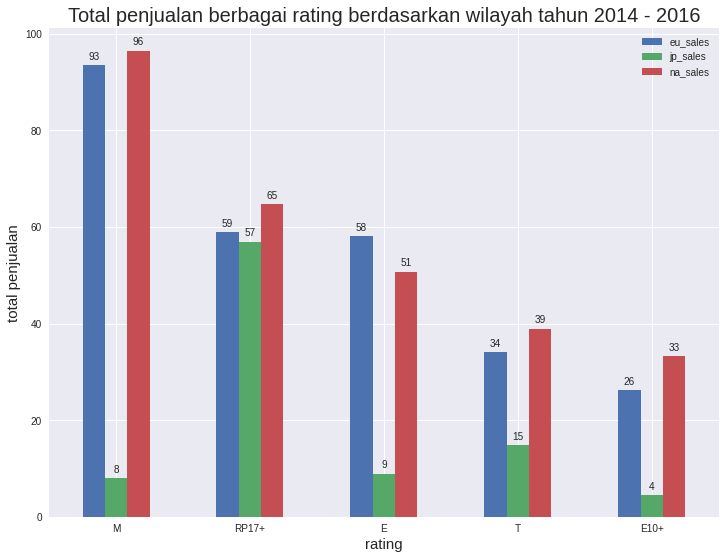

In [49]:
#barplot rating dengan total penjualan di berbagai wilayah

ax = rating_sales.plot(x='rating', y=['eu_sales','jp_sales','na_sales'], kind='bar',figsize=(12,9))

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set_xlabel('rating',fontdict={'size': 15})
ax.set_ylabel('total penjualan',fontdict={'size': 15})
plt.title('Total penjualan berbagai rating berdasarkan wilayah tahun 2014 - 2016',fontdict={'size': 20})
plt.xticks(rotation = 0) 
plt.show()


Dari barplot di atas dapat diketahui bahwa:

* Rating **Mature17+** memiliki penjualan **tertinggi** di **amerika utara** 
* Di **jepang**, penjualan tertinggi yaitu rating **RP17+** 
* Rating **Everyone** paling diminati di **eropa**
* Rating **Teen** paling diminati di **amerika utara**
* Rating **Everyone10** paling diminati di **amerika utara**
* Secara umum, **penjualan** di **jepang** relatif **rendah** dan penjualan yang **tinggi** yaitu di **amerika utara**

# Analisis Data Statistik

## Rata-rata rating pengguna platform Xbox One dan PC adalah sama.


In [57]:
# xone
df1 = df1.dropna(subset=['user_score'])
xone_score = df1.query('platform in ("xone")')
xone_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,xone,2014,action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,xone,2014,shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,xone,2015,shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,xone,2015,role-playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
373,Assassin's Creed: Unity,xone,2014,action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
16597,Saints Row: Gat out of Hell,xone,2015,action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
16630,Sébastien Loeb Rally Evo,xone,2016,racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,xone,2016,sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16660,Prison Architect,xone,2016,action,0.01,0.00,0.00,0.00,74.0,6.7,RP17+,0.01


In [58]:
# pc
pc_score = df1.query('platform in ("pc")')
pc_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
458,The Sims 4,pc,2014,simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
1530,Fallout 4,pc,2015,role-playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28
1730,Grand Theft Auto V,pc,2015,action,0.39,0.69,0.0,0.09,96.0,7.9,M,1.17
2303,The Elder Scrolls Online,pc,2014,role-playing,0.32,0.51,0.0,0.07,71.0,5.7,M,0.90
2784,Dragon Age: Inquisition,pc,2014,role-playing,0.33,0.34,0.0,0.06,85.0,5.9,M,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...
16456,Fallout Anthology,pc,2015,action,0.00,0.01,0.0,0.00,NaN,8.3,RP17+,0.01
16463,TrackMania Turbo,pc,2016,action,0.00,0.01,0.0,0.00,79.0,6.8,E,0.01
16509,Ride 2,pc,2016,racing,0.00,0.01,0.0,0.00,78.0,7.9,E,0.01
16518,Rugby World Cup 2015,pc,2015,sports,0.00,0.01,0.0,0.00,NaN,1.4,E,0.01


Sekarang kita akan menguji hipotesis yang menyatakan bahwa Rata-rata rating pengguna platform Xbox One dan PC adalah sama. Kita akan menggunakan T Test 2 sample karena terdapat data `xone` dan `pc`. Sebelum melakukan uji hipotesis, kita akan menguji apakah varians antara kedua sampel sama atau tidak

In [59]:
#uji levene

st.levene(xone_score['user_score'], pc_score['user_score'])

LeveneResult(statistic=0.6767655461512543, pvalue=0.41135395947100595)

Dikarenakan p-value nya > dari nilai alpha yang akan digunakan (0.05) maka varians antara kedua sample akan dianggap sama

H0 = Rata - rata **rating** pengguna platform `xone` dan `pc` adalah **sama**

H1 = Rata - rata **rating** pengguna platform `xone` dan `pc` adalah **berbeda**

In [65]:
# Uji hipotesisnya

alpha = 0.05
results = st.ttest_ind(xone_score['user_score'], pc_score['user_score'],equal_var=True)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha): 
    print('Kita menolak hipotesis nol')
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value:  0.5858355856278792
Kita tidak dapat menolak hipotesis nol


## Rata-rata rating pengguna genre Action dan Sports berbeda

In [61]:
# action
action_score = df1.query('genre in ("action")')
action_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,xone,2014,action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
231,Uncharted: The Nathan Drake Collection,ps4,2015,action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
295,Watch Dogs,ps4,2014,action,1.40,1.90,0.11,0.64,80.0,6.3,M,4.05
304,Assassin's Creed: Unity,ps4,2014,action,1.19,2.07,0.08,0.62,70.0,4.9,M,3.96
...,...,...,...,...,...,...,...,...,...,...,...,...
16597,Saints Row: Gat out of Hell,xone,2015,action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
16652,Fast Racing Neo,wiiu,2016,action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01
16660,Prison Architect,xone,2016,action,0.01,0.00,0.00,0.00,74.0,6.7,RP17+,0.01
16672,Metal Gear Solid V: The Definitive Experience,xone,2016,action,0.01,0.00,0.00,0.00,NaN,0.0,M,0.01


In [62]:
# sports
sports_score = df1.query('genre in ("sports")')
sports_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
77,FIFA 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
143,FIFA 15,ps4,2014,sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
264,FIFA 15,ps3,2014,sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28
314,NBA 2K16,ps4,2015,sports,2.49,0.66,0.03,0.69,87.0,6.7,E10+,3.87
...,...,...,...,...,...,...,...,...,...,...,...,...
16142,MLB 15: The Show,psv,2015,sports,0.01,0.00,0.00,0.00,NaN,8.8,E,0.01
16146,Don Bradman Cricket 14,ps3,2014,sports,0.00,0.01,0.00,0.00,73.0,6.9,E,0.01
16518,Rugby World Cup 2015,pc,2015,sports,0.00,0.01,0.00,0.00,NaN,1.4,E,0.01
16638,Tour de France 2014,ps3,2014,sports,0.00,0.01,0.00,0.00,NaN,0.0,E,0.01


Sekarang kita akan menguji hipotesis yang menyatakan bahwa Rata-rata rating penggunagenre Action dan Sports berbeda. Kita akan menggunakan T Test 2 sample karena terdapat data `action` dan `sports`. Sebelum melakukan uji hipotesis, kita akan menguji apakah varians antara kedua sampel sama atau tidak

In [63]:
#uji levene

st.levene(action_score['user_score'], sports_score['user_score'])

LeveneResult(statistic=0.20951884839919718, pvalue=0.6473554212463353)

Dikarenakan p-value nya > dari nilai alpha yang akan digunakan (0.05) maka varians antara kedua sample akan dianggap sama

H0 = Rata - rata **rating** pengguna genre `action` dan `sports` adalah **sama**

H1 = Rata - rata **rating** pengguna genre `action` dan `sports` adalah **berbeda**

In [66]:
# Uji hipotesisnya

alpha = 0.05
results = st.ttest_ind(action_score['user_score'], sports_score['user_score'],equal_var=True)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha): 
    print('Kita menolak hipotesis nol')
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value:  9.92015750638991e-06
Kita menolak hipotesis nol


* Hasil uji hipotesis pertama menyatakan bahwa kita **tidak bisa menolak** hipotesis bahwa rata-rata **rating** pengguna platform xone dan pc adalah **sama**
* Hasil uji hipotesis kedua menyatakan bahwa kita **menolak** hipotesis bahwa rata - rata **rating** pengguna genre `action` dan `sports` adalah **sama**

# Kesimpulan

Kesimpulan dari keseluruhan proyek ini yaitu:

1. Pra-Pemrosesan Data

* Tidak ada data yang terduplikasi
* Terdapat kolom yang harus diubah tipe datanya, yaitu kolom `User_Score` dan `Rating` dari tipe data object ke tipe data float
* Merubah tipe data di kolom `Year_of_Release` menjadi integer
* Merubah semua nama kolom dengan huruf kecil
* Terdapat beberapa kolom dengan nilai yang hilang yaitu kolom `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, dan `Rating`
* Menghapus nilai yang hilang di kolom `Name`, `Year_of_Release`, `Genre` karena presentasenya relatif kecil

2. Analisis Data Eksploratif

* **Jumlah games** terbanyak yang dirilis yaitu sebesar **1426** pada **tahun 2008**
* Jumlah games yang dirilis mengalami peningkatan dari tahun 1980 hingga puncaknya pada 2008. Setelah itu tren cenderung menurun
* Terdapat beberapa platform yang memiliki total penjualan tertinggi namun pada beberapa tahun terakhir justru tidak ada penjualan apapun. Misalnya pada platform **ps2**
* **Tren** penjualan pada **3 tahun terakhir** (2014 - 2016) cenderung mengalami **penurunan**
* Skor pengguna maupun kritik tidak memberikan pengaruh yang terlalu signifikan terhadap besarnya penjualan
* Penjualan **ps4** dengan genre **action** dan rating **Mature(M)** menjadi **penjualan tertinggi di eropa**
* Penjualan **xone** dengan genre **shooter** dan rating **Mature(M)** menjadi **penjualan tertinggi di amerika utara**
* Penjualan **3ds** dengan genre **role-playing** dan rating **RP17+ menjadi penjualan tertinggi di jepang
* Secara umum, penjualan di jepang relatif rendah dan penjualan yang tinggi yaitu di amerika utara
* Genre action, shooter, sports, role-playing, dan misc menjadi genre yang paling banyak meraup keuntungan
* Platform **ps4**, **xone**, **3ds**, **wiiu**, dan **pc** merupakan 5 **platform** yang memiliki **potensi** untuk masih bisa **meraup keuntungan** di tahun selanjutnya 
* Platform **ps3** dan **x360** memiliki jumlah **penjualan** yang sangat **kecil** pada tahun 2016 sehingga ada kemungkinan di **tahun berikutnya** akan **semakin turun** atau bahkan tidak memiliki penjualan

3. Analisis Data Statistik

* Tidak terdapat perbedaan antara rating pengguna platform `xone` dan `pc` 
* Terdapat perbedaan rating pengguna genre `action` dan `sports`